<a href="https://colab.research.google.com/github/HuaTrung/Colab/blob/master/Logictis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib as plt

In [0]:
class MyLinearRegression:
    def __init__(self,x,y,degree,lerning_rate):
        self.size=len(x)
        self.x_plot = x
        self.x = self.map_feature(x,degree)
        self.y = y.reshape(-1,1)
        self.theta=np.zeros(self.x.shape[1])
        self.lerning_rate=lerning_rate
        self.listCostFunction=[]
    
    def costFunction(self):
      return np.sum(1/(2*self.size)*(self.x.dot(self.theta)-self.y.flatten())**2)
    
    def gradientDescent(self):
      self.theta=self.theta-self.x.T.dot((self.x.dot(self.theta)-self.y.flatten()))*self.lerning_rate/self.size
        
    def makeSomeThingFun(self,iteration,tracking=None):
        for i in range(iteration):
            self.gradientDescent()
            if(tracking is not None and iteration%tracking==0):
              self.listCostFunction.append([i,self.costFunction()])
    
    def trackingCostFunction(self):
        sns.set(rc={'figure.figsize':(9,6)})
        track=sns.lineplot(x="x",y="y",data=pd.DataFrame.from_dict({"x":[i[0] for i in self.listCostFunction],"y":[i[1] for i in self.listCostFunction]}))
        
    def CompareAccuracy(self):
        clf = LinearRegression(normalize=True)
        clf.fit(self.x,self.y)
        sk_y_pred = clf.predict(self.x_plot)
        me_y_pred=np.sum(self.theta*self.x,axis=1)
        print ("sklearn: ")
        print(r2_score(self.y,sk_y_pred))
        print ("Me: ")
        print(r2_score(self.y,me_y_pred))

    def standardize(self,data):
        return (data - np.mean(data))/(np.max(data) - np.min(data))
    
    def map_feature(self,x,degree):
        pram=[]
        for i in range(x.shape[1]):
            pram.append([x[:,i],i,i+1])
        result=np.array([x[:,i] for i in range(x.shape[1])]).T
        listCurPar=result
        result=self.standardize(result)
        for i in range(2,degree+1):
            list_temp=[]

            for index in range(len(pram)):  
                temp=0;
                for j in range(pram[index][1],listCurPar.shape[1]):
                    temp=temp+1
                    list_temp.append((pram[index][0]*listCurPar[:,j]))

                if(pram[index][1]==0):
                    pram[index][1]=0
                    pram[index][2]=pram[index][1]+temp
                else:
                    pram[index][1]=pram[index-1][2]
                    pram[index][2]=pram[index][1]+temp
            listCurPar=np.array(list_temp).T;
            for i in list_temp:
                result=np.append(result,self.standardize(i.reshape(-1,1)),axis=1)
        return np.append(np.ones(x.shape[0]).reshape(-1,1),result,axis=1)

    def plot(self,model=None):
        sns.set(rc={'figure.figsize':(9,6)})
        ax=sns.scatterplot(x="x",y="y",data=pd.DataFrame.from_dict({"x":self.x_plot.flatten(),"y":self.y.flatten()}))
        if(model is not None):
          ax=sns.lineplot(x="x",y="y",data=pd.DataFrame.from_dict({"x":self.x_plot.flatten(),"y":self.x.dot(self.theta).flatten()}))

In [0]:
def generatePolyPoints(start, stop, num_points, coeff, noiseLevel = 1, plot = 1):
    x_pts = np.arange(start, stop, (stop - start)/num_points)
    line = coeff[0]
    
    for i in np.arange(1, len(coeff)):          
        line += coeff[i] * x_pts ** i 

    if noiseLevel > 0:
        y_pts = np.random.normal(-(10 ** noiseLevel), 10 ** noiseLevel, len(x_pts)) + line
    else:
        y_pts = line

    if plot == 1: #Plot option
        plt.figure()
        plt.scatter(x_pts, y_pts)
        plt.xlabel('x')
        plt.ylabel('y')
        
    return x_pts, y_pts

In [0]:
x_pts, y_pts = generatePolyPoints(0, 50, 100, [5, 1, 1], 
                                  noiseLevel = 2, plot = 0)

In [0]:
import sklearn.datasets as dataset

In [0]:
boston = dataset.load_boston()

In [32]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

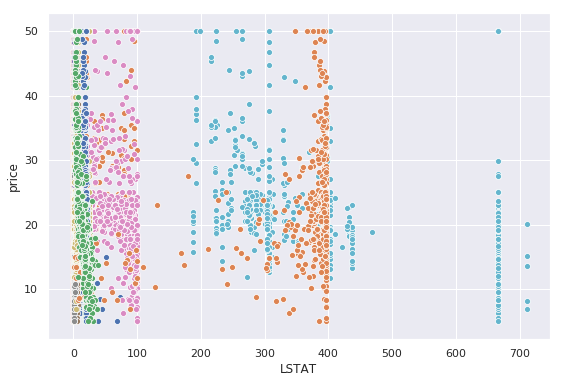

In [36]:
for i in range(len(boston.feature_names)):
  sns.set(rc={'figure.figsize':(9,6)})
  sns.scatterplot(x=boston.feature_names[i],y="price",data=pd.DataFrame.from_dict({boston.feature_names[i]:boston.data[:,i].flatten(),"price":boston.target.flatten()}))